<a href="https://colab.research.google.com/github/LuanaLeite/trabalho-individual/blob/main/Entrega_2_Luana_Leite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Individual para a disciplina de Introdução a Data Science**


> **Aluna**: Luana Leite Rodrigues 

> **Repositório**: https://github.com/LuanaLeite/trabalho-individual

# **Contexto**

**A empresa**: vende produtos de emagrecimento via canais digitais. Conta com uma audiência de mais de 6M de inscritos no Youtube e, aproximadamente, 980mil seguidores no Instagram. Além da produção de conteúdo orgânico, utilização de estratégias de lançamento de produto, a empresa também investe cerca de R$800 mil reais em tráfego pago por mês para captação de leads. 

**Problemática:** a empresa está no mercado desde 2019 e, recentemente, vem enfrentando novos desafios em relação ao custo de aquisição de clientes e redução de margem de lucro. Dado esse cenário, a grande pergunta feita pelo principal gestor da empresa, demandante da análise, foi "*Quem são os nossos melhores clientes? O que eles compraram?*".   



# **Dados fornecidos**

Para responder a pergunta feita pelo gestor da empresa, foi disponibilizada uma base de vendas histórica de janeiro de 2020 até abril de 2023. A base é constituída do histórico de 5 plataformas de vendas (hotmart, guru-info, guru-sup, upnid e nutlog). Para organização e manipulação dos dados, tudo foi concatenado em excel, com trativas específicas para deixar as bases no mesmo formato e padronizar seus campos. 

Para melhor compreensão da base extraída para análise, confira o **dicionário de variáveis**: [dicionário de variáveis.](https://docs.google.com/spreadsheets/d/1h7uDHroNP6_lTfM1Is5HvlHgBBAP84sNmIXJD1hWgEo/edit?usp=sharing)

## *Coleta e pré-processamento*
A empresa forneceu a base histórica das plataformas de vendas citadas anteriormente em Excel. Em domínio da base, foi necessário realizar ajustes de padronização, tratamento de formatação de variáveis como textos, números e datas. Após as alterações, foi gerado um documento em CSV. Devido ao tamanho do arquivo não foi possível salvar no repositório do Git, por isso, o arquivo com os dados foi salvo Google Drive da aluna. 

Mesmo após o tratamento inicial realizado no Excel, foi necessário realizar ajustes após importação dos dados no Colab. Todas as datas ainda estavam sendo identificadas como "Object" e foi necessário realizar a conversão das mesmas via código para serem identificadas como "datetime64".

# **Importação dos dados**

In [744]:
# Common standard libraries

import datetime
import time
import os

In [745]:
# Common external libraries

import pandas as pd
import numpy as np
import sklearn # scikit-learn
import requests
from bs4 import BeautifulSoup
import math 

In [746]:
# Visualization libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [747]:
# Setting plot appearance

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

In [748]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [749]:
df = pd.read_csv('/content/drive/My Drive/base_dados_vf.csv', sep=',')

<ipython-input-749-17d116d83fd1>:1: DtypeWarning: Columns (18,19,20,21,22,23,24,25,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/base_dados_vf.csv', sep=',')


## **Visualização da base e ajustes de tipo de dados**

In [750]:
df.shape

(193367, 39)

In [751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193367 entries, 0 to 193366
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   email_cliente            193367 non-null  object 
 1   nome_cliente             193367 non-null  object 
 2   transaction_status       193367 non-null  object 
 3   transaction_id           193366 non-null  object 
 4   data_pedido              193367 non-null  object 
 5   valor_venda              193367 non-null  float64
 6   nome_produto             193366 non-null  object 
 7   oferta                   185841 non-null  object 
 8   cep                      93669 non-null   object 
 9   pais                     186426 non-null  object 
 10  estado                   93673 non-null   object 
 11  cidade                   93669 non-null   object 
 12  classificacao_transacao  193367 non-null  object 
 13  primeiro_produto         185526 non-null  object 
 14  data

Ajuste de variáveis que vieram fora do formato correto

In [752]:
df = df.astype({"data_pedido":'datetime64[ms]',
                "data_primeira_compra":'datetime64[ms]',
                "data_priemeira_captura":'datetime64[ms]'})



In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193367 entries, 0 to 193366
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   email_cliente            193367 non-null  object        
 1   nome_cliente             193367 non-null  object        
 2   transaction_status       193367 non-null  object        
 3   transaction_id           193366 non-null  object        
 4   data_pedido              193367 non-null  datetime64[ns]
 5   valor_venda              193367 non-null  float64       
 6   nome_produto             193366 non-null  object        
 7   oferta                   185841 non-null  object        
 8   cep                      93669 non-null   object        
 9   pais                     186426 non-null  object        
 10  estado                   93673 non-null   object        
 11  cidade                   93669 non-null   object        
 12  classificacao_tr

In [754]:
print(df)

                      email_cliente                 nome_cliente  \
0               1.analoyo@gmail.com       Ana Paula Moreira Loyo   
1          dinhalove.sa@hotmail.com        Sandra Siqueira De Sa   
2          dinhalove.sa@hotmail.com        Sandra Siqueira De Sá   
3           abreu.capas@outlook.com   Geraldo Francisco De Abreu   
4           abreu.capas@outlook.com    Geraldo Francisco De Abeu   
...                             ...                          ...   
193362  tam.ferreira_jf@hotmail.com    Tamires De Jesus Ferreira   
193363         docusse@yahoo.com.br  Maria Estela Macedo Docusse   
193364         cgdsalto45@gmail.com  Claudio Gilberto Dalcortivo   
193365         cgdsalto45@gmail.com  Claudio Gilberto Dalcortivo   
193366   lehandersantos00@gmail.com              Lehander Santos   

       transaction_status                        transaction_id data_pedido  \
0                approved                      HP11416037591401  2020-10-26   
1                approved

In [755]:
df.head()

,email_cliente,nome_cliente,transaction_status,transaction_id,data_pedido,valor_venda,nome_produto,oferta,cep,pais,...,utm_campaign,utm_term,utm_content,email_pesquisa,metodo_pagamento,email_primeira_captura,data_priemeira_captura,origem_primeira_captura,evento_primeira_captura,telefone
0,1.analoyo@gmail.com,Ana Paula Moreira Loyo,approved,HP11416037591401,2020-10-26,997.00,PED • Programa de Emagrecimento Definitivo [R],11pz9ih9,NaN,Brasil,...,NaN,NaN,NaN,1.analoyo@gmail.com,Cartão de Crédito,NaN,NaT,NaN,NaN,NaN
1,dinhalove.sa@hotmail.com,Sandra Siqueira De Sa,approved,9377dd03-98a9-4dc0-b6a6-1441c9134dc3,2021-05-19,583.44,[PED] Programa do Emagrecimento (Assinatura),"12x de R$48,62",NaN,BR,...,NaN,NaN,29387692,dinhalove.sa@hotmail.com,Cartão de Crédito,dinhalove.sa@hotmail.com,2022-01-04,email,PED-c01-2022-jan,NaN
2,dinhalove.sa@hotmail.com,Sandra Siqueira De Sá,approved,94e8017d-a614-4d2c-ae30-a89edd57e9fe,2021-11-18,2082.00,Kit Desinflama - 12 Potes de Cada,Kit Desinflama - 12 Potes de Cada (Frete Grátis),64890000,BR,...,NaN,NaN,53422512,dinhalove.sa@hotmail.com,Cartão de Crédito,dinhalove.sa@hotmail.com,2022-01-04,email,PED-c01-2022-jan,NaN
3,abreu.capas@outlook.com,Geraldo Francisco De Abreu,approved,94cbc175-d426-42ec-a4dd-7941910e3f80,2021-11-04,480.90,Fórmula SB3 - Kit com 3 Potes,Fórmula SB3 - Kit com 3 Potes (Frete Grátis),32050410,BR,...,NaN,NaN,52746070,abreu.capas@outlook.com,Cartão de Crédito,abreu.capas@outlook.com,2021-12-19,email,PED-c01-2022-jan,5531985140520
4,abreu.capas@outlook.com,Geraldo Francisco De Abeu,approved,951e7aa9-a879-4059-8dea-afdd01849d07,2021-12-15,625.00,Multivita Men & Women - Kit casal com 6 Potes,Multivita Men & Women (Homens e Mulheres) - Ki...,32050410,BR,...,NaN,NaN,453473,abreu.capas@outlook.com,Cartão de Crédito,abreu.capas@outlook.com,2021-12-19,email,PED-c01-2022-jan,5531985140520


# **Análise exploratória dos dados**

In [756]:
menor_data = min(df['data_pedido'])
print(menor_data)


2020-01-01 00:00:00


In [757]:
maior_data = max(df['data_pedido'])
print(maior_data)

2023-04-09 20:18:35


In [758]:
df[['ltv_cliente']].describe()

,ltv_cliente
count,185526.000000
mean,1203.927148
std,1713.500604
min,5.000000
25%,239.900000
50%,583.440000
75%,1442.400000
max,22083.000000


In [759]:
df[['primeiro_produto']].describe()

,primeiro_produto
count,185526
unique,213
top,Revista Digital: Viva com Saúde por Dr. Dayan ...
freq,52809


In [760]:
df[['idade']].describe()

,idade
count,47119
unique,61
top,56 - 65 anos
freq,14798


In [761]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
valor_venda,193367.0,391.670814,348.239101,0.0,153.9,216.33,577.32,2499.24
valor_primeira_compra,185526.0,407.488197,359.026737,5.0,153.9,206.00,583.00,2499.24
num_transacoes,185526.0,2.920017,3.372321,1.0,1.0,2.00,3.00,47.00
ltv_cliente,185526.0,1203.927148,1713.500604,5.0,239.9,583.44,1442.40,22083.00
quantidade_produto,6024.0,2.240372,2.733802,0.0,0.0,1.00,3.00,24.00


<Axes: >

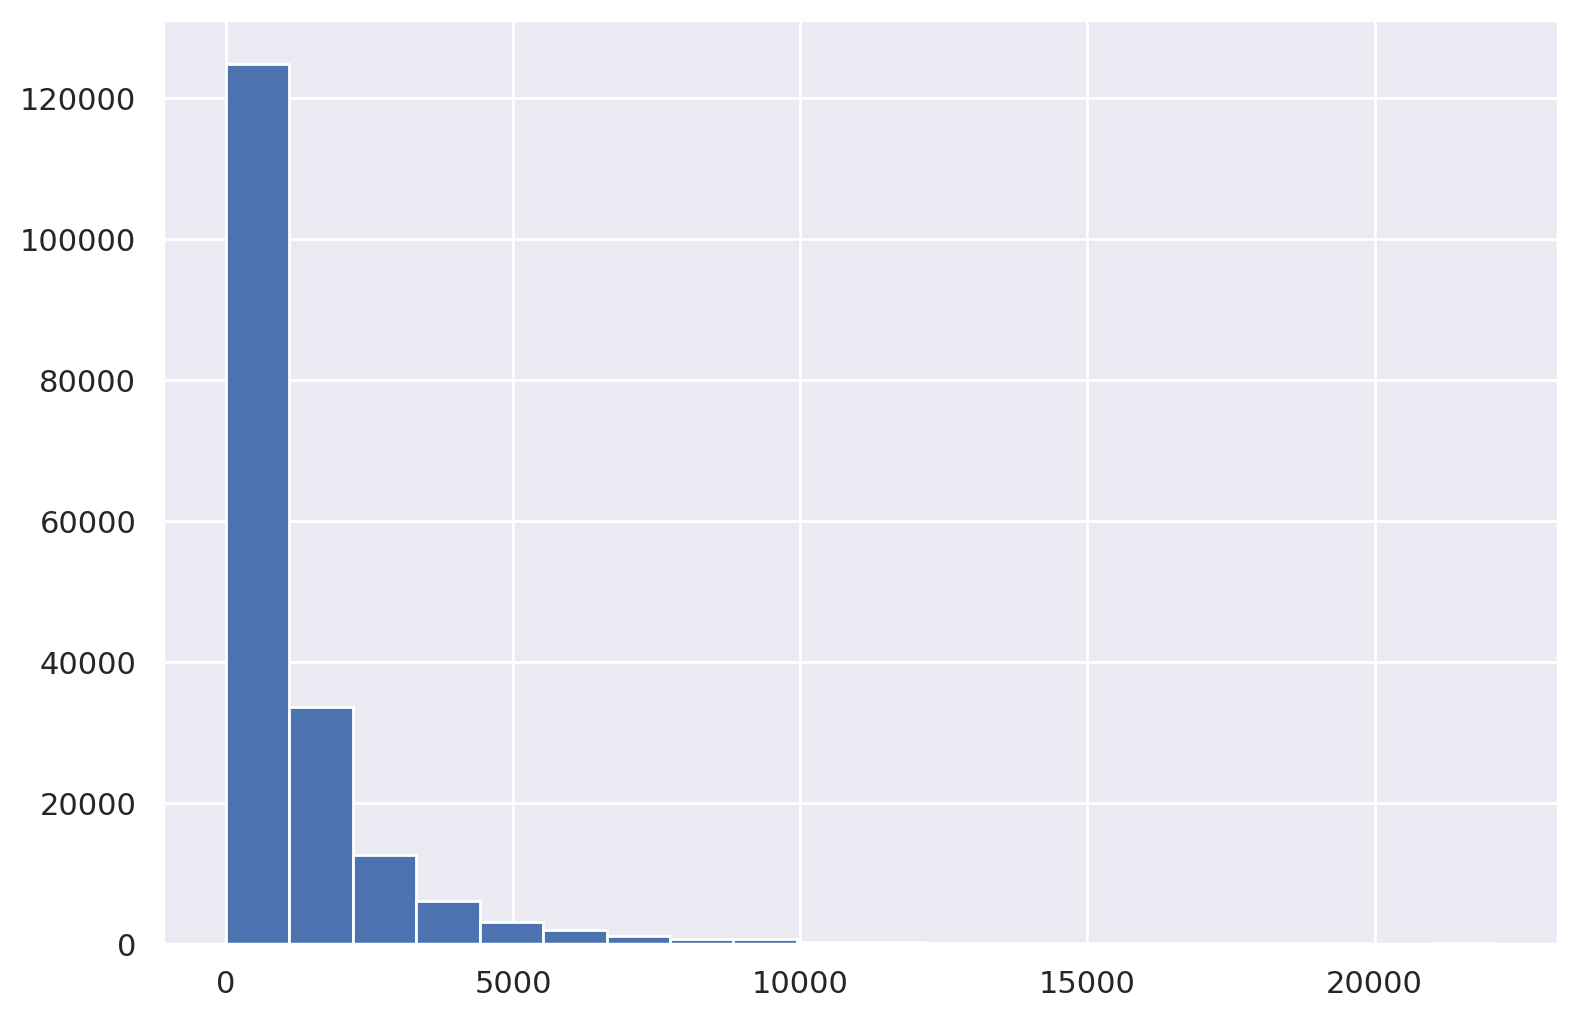

In [762]:
df['ltv_cliente'].hist(bins=20)

In [763]:
df.groupby(['transaction_status']).count()

,email_cliente,nome_cliente,transaction_id,data_pedido,valor_venda,nome_produto,oferta,cep,pais,estado,...,utm_campaign,utm_term,utm_content,email_pesquisa,metodo_pagamento,email_primeira_captura,data_priemeira_captura,origem_primeira_captura,evento_primeira_captura,telefone
transaction_status,,,,,,,,,,,,,,,,,,,,,
approved,193367,193367,193366,193367,193367,193366,185841,93669,186426,93673,...,33031,145,92618,51732,193367,67299,67299,66548,67299,45305


In [764]:
df.groupby(['nome_produto']).count()

,email_cliente,nome_cliente,transaction_status,transaction_id,data_pedido,valor_venda,oferta,cep,pais,estado,...,utm_campaign,utm_term,utm_content,email_pesquisa,metodo_pagamento,email_primeira_captura,data_priemeira_captura,origem_primeira_captura,evento_primeira_captura,telefone
nome_produto,,,,,,,,,,,,,,,,,,,,,
Acesso Cozinha Vitascience,5,5,5,5,5,5,5,5,5,5,...,5,1,4,4,5,4,4,4,4,3
Bela Vita,607,607,607,607,607,607,607,607,607,607,...,463,0,363,319,607,437,437,432,437,303
Belavita - Kit com 3 Potes,397,397,397,397,397,397,397,397,397,397,...,387,0,236,212,397,263,263,259,263,195
Belavita - Kit com 5 Potes,6,6,6,6,6,6,6,6,6,6,...,4,0,4,0,6,4,4,4,4,0
Belavita - Kit com 8 Potes,127,127,127,127,127,127,127,127,127,127,...,123,0,80,68,127,93,93,93,93,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ômega Vita - Kit com 7 Potes,6,6,6,6,6,6,6,6,6,6,...,2,0,1,4,6,5,5,5,5,4
Ômega Vita - Kit com 7 Potes (Frete grátis),191,191,191,191,191,191,191,191,191,191,...,60,0,130,107,191,122,122,121,122,99
Ômega Vita - Kit com 8 Potes,340,340,340,340,340,340,340,340,340,340,...,317,0,275,171,340,239,239,237,239,164


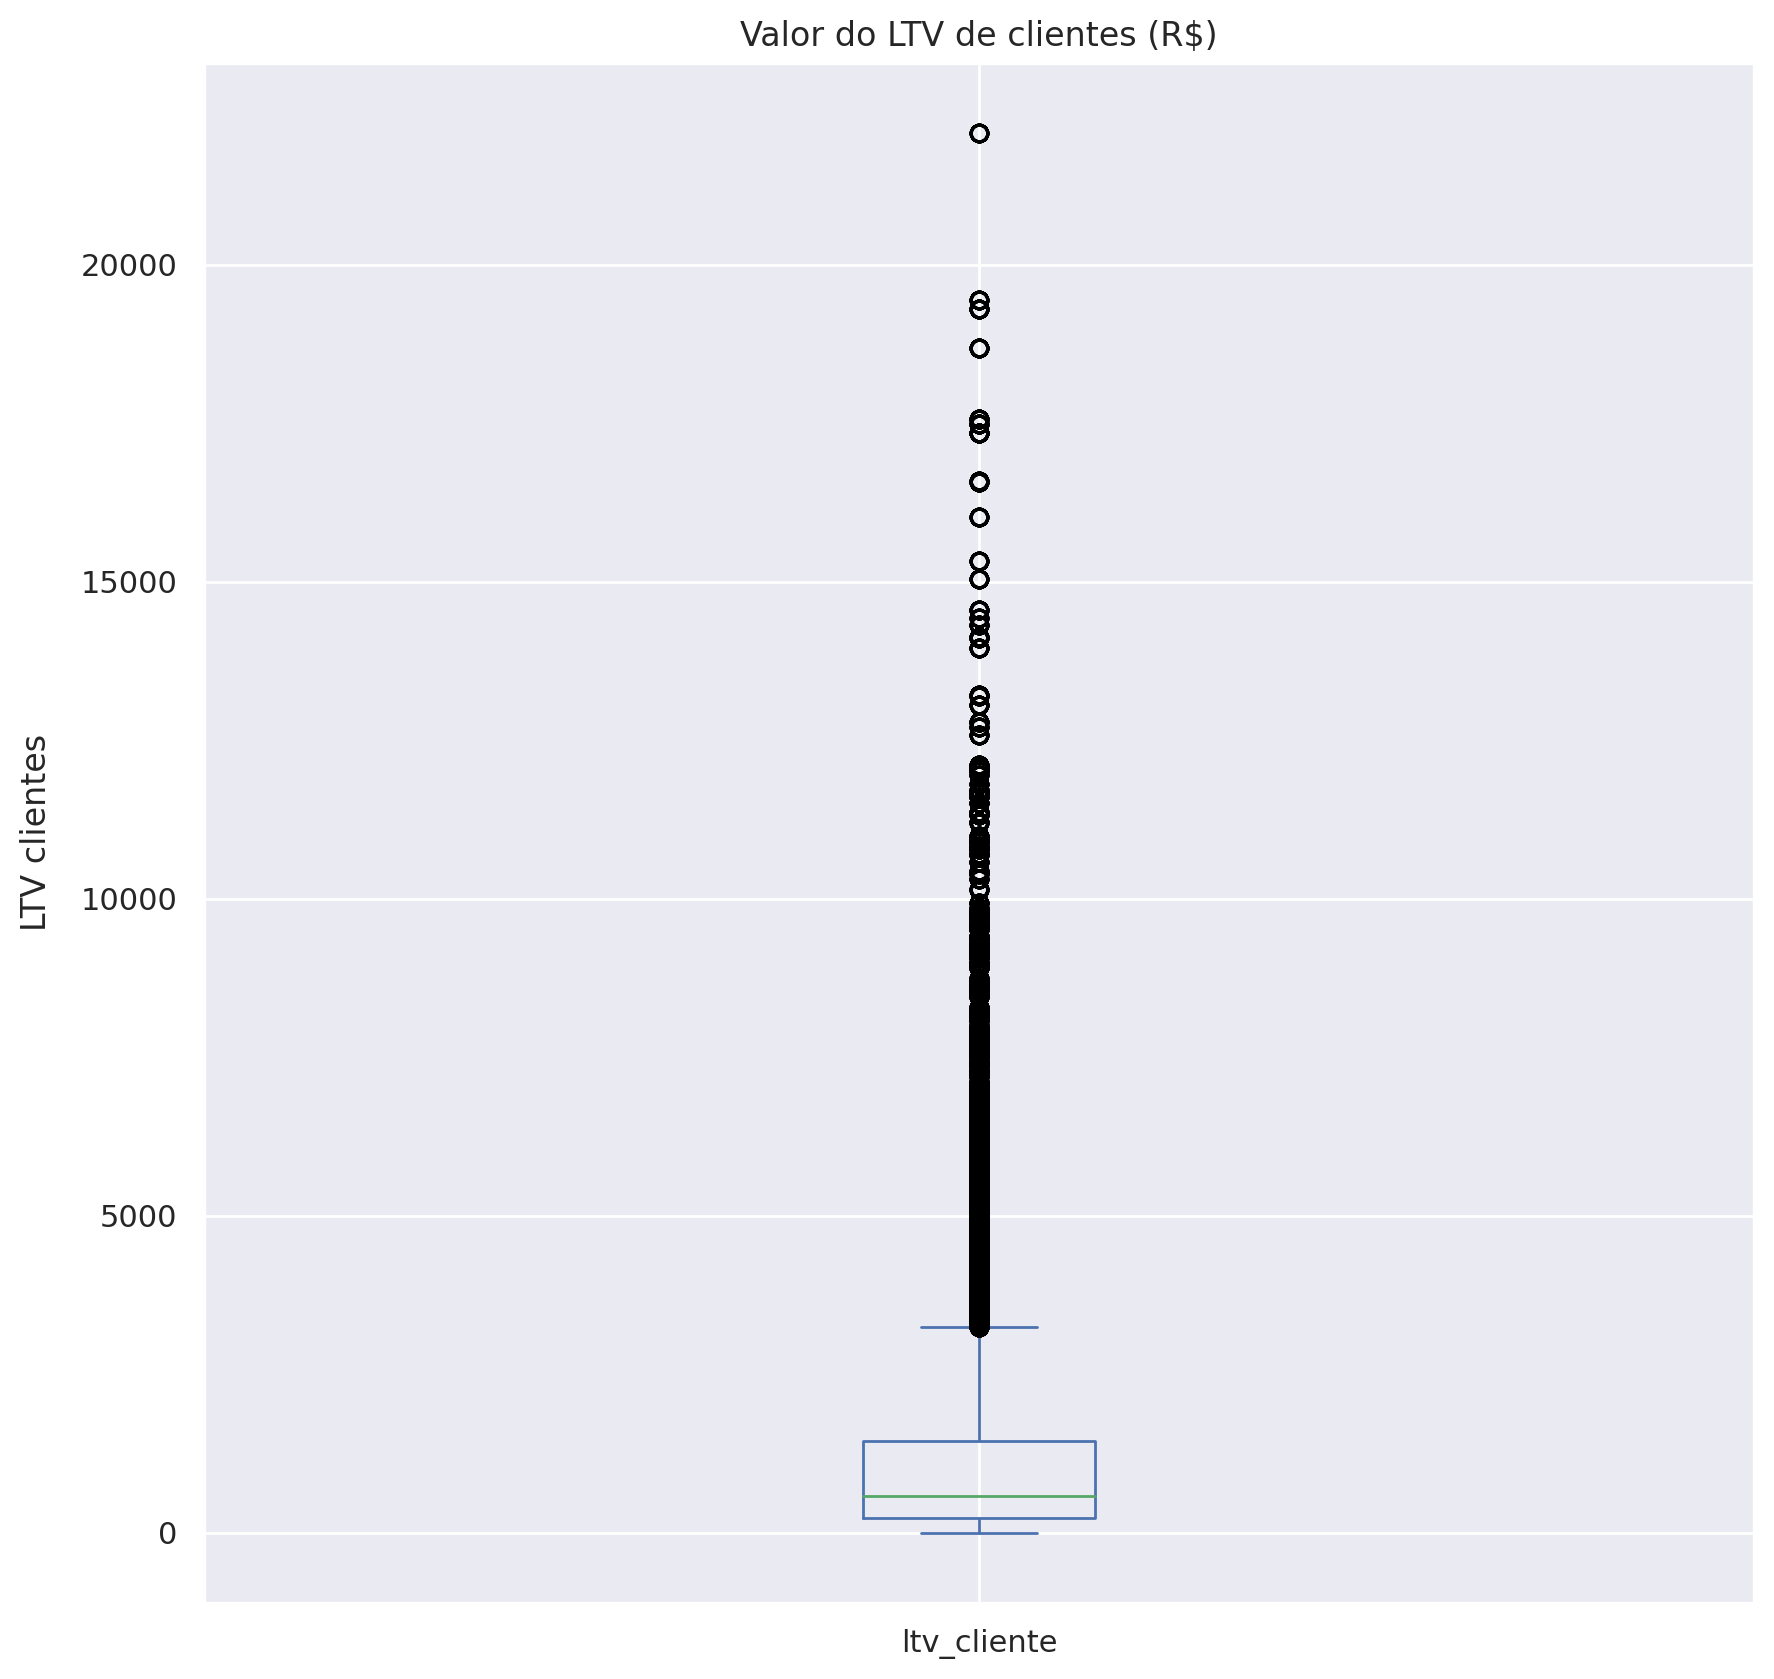

In [765]:
ax = df[['ltv_cliente']].plot(
    kind='box',
    grid=True, 
    figsize=(10, 10),

)

ax.set_ylabel('LTV clientes')
ax.set_title('Valor do LTV de clientes (R$)')

plt.show()

In [766]:
pd.DataFrame(
    df.groupby(
        by='primeiro_produto'
    )['valor_primeira_compra', 'quantidade_produto'].sum()
)

<ipython-input-766-3cb988a1427f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(


,valor_primeira_compra,quantidade_produto
primeiro_produto,,
Bela Vita,63794.25,42.0
Belavita - Kit com 3 Potes,60412.50,1.0
Belavita - Kit com 5 Potes,1253.00,10.0
Belavita - Kit com 8 Potes,39738.00,6.0
Belavita - Pote Unitário,12565.80,1.0
...,...,...
Ômega Vita - Kit com 7 Potes,2490.46,0.0
Ômega Vita - Kit com 7 Potes (Frete grátis),11731.66,0.0
Ômega Vita - Kit com 8 Potes,77215.57,16.0


Avalia a quantidade de clientes por estado

In [767]:
clientes_por_estado = df.groupby('estado')['email_cliente'].nunique()

print(clientes_por_estado)


estado
01         3
04         1
05         1
06         2
08         2
          ..
TX         2
VA         1
VD         1
ZH         1
alagoas    1
Name: email_cliente, Length: 106, dtype: int64


# Preparação de variáveis relevantes para a análise

**Idade**

In [768]:
print(df['idade'])

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
193362    NaN
193363    NaN
193364    NaN
193365    NaN
193366    NaN
Name: idade, Length: 193367, dtype: object


Exclusão dos registros sem valor de idade preenchido

In [769]:
df_novo = df.dropna(subset=['idade'])

In [770]:
print(df_novo['idade'])

20       46 - 55 anos
21       46 - 55 anos
53       46 - 55 anos
54       46 - 55 anos
56       46 - 55 anos
             ...     
51727    26 - 35 anos
51728    36 - 45 anos
51729    56 - 65 anos
51730    46 - 55 anos
51731    56 - 65 anos
Name: idade, Length: 47119, dtype: object


Visualizar idades únicas

In [771]:
idades_unicas = np.unique(df_novo['idade'])

print(idades_unicas)

['18 - 24 anos' '21 - 25 anos' '25' '25 - 29 anos' '26 - 35 anos' '30'
 '30 - 34 anos' '32' '33' '34' '35' '35 - 39 anos' '36' '36 - 45 anos'
 '37' '38' '39' '40' '40 - 44 anos' '41' '42' '43' '44' '45'
 '45 - 49 anos' '46' '46 - 55 anos' '47' '48' '49' '50' '50 - 54 anos'
 '51' '52' '53' '54' '55' '55 - 59 anos' '56' '56 - 65 anos' '57' '58'
 '59' '60' '60 - 69 anos' '61' '62' '63' '64' '65' '66 - 70 anos' '67'
 '68' '69' '70' '70 ou mais' '71 - 80 anos' '72' '80' '81 ou mais'
 'Menos de 20 anos']


Classificar idades

In [772]:
def classificar_idade(idade):
    if idade == '18 - 24 anos' or idade == '21 - 25 anos' or idade == 'Menos de 20 anos':
        return '24 anos ou menos'
    elif idade == '25' or idade == '25 - 29 anos' or idade == '26 - 35 anos' or idade == '30' or idade == '30 - 34 anos' or idade == '32' or idade == '33' or idade == '34':
        return '25 - 34 anos'
    elif idade == '35' or idade == '35 - 39 anos' or idade == '36' or idade == '36 - 45 anos' or idade == '37' or idade == '38' or idade == '39' or idade == '40' or idade == '40 - 44 anos' or idade == '41' or idade == '42' or idade == '43' or idade == '44':
        return '35 - 44 anos'
    elif idade == '45' or idade == '45 - 49 anos' or idade == '46' or idade == '46 - 55 anos' or idade == '47' or idade ==  '48' or idade == '49' or idade == '50' or idade == '50 - 54 anos' or idade == '51' or idade == '52' or idade == '53' or idade == '54':
        return '45 - 54 anos'
    elif idade == '55' or idade == '55 - 59 anos' or idade == '56' or idade == '56 - 65 anos' or idade == '57' or idade == '58' or idade == '59' or idade == '60' or idade == '61' or idade == '62' or idade == '63' or idade == '64': 
      return '55 - 64 anos'
    else:
      return '65 anos ou mais'

df_novo['faixas_idade'] = df_novo['idade'].apply(classificar_idade)

print(df_novo['faixas_idade'])

20       45 - 54 anos
21       45 - 54 anos
53       45 - 54 anos
54       45 - 54 anos
56       45 - 54 anos
             ...     
51727    25 - 34 anos
51728    35 - 44 anos
51729    55 - 64 anos
51730    45 - 54 anos
51731    55 - 64 anos
Name: faixas_idade, Length: 47119, dtype: object


<ipython-input-772-1f5988c8494c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo['faixas_idade'] = df_novo['idade'].apply(classificar_idade)


In [773]:
idades_unicas = np.unique(df_novo['faixas_idade'])

print(idades_unicas)

['24 anos ou menos' '25 - 34 anos' '35 - 44 anos' '45 - 54 anos'
 '55 - 64 anos' '65 anos ou mais']


In [774]:
df_novo['faixas_idade'].describe()

count            47119
unique               6
top       55 - 64 anos
freq             15048
Name: faixas_idade, dtype: object

Renda mensal

In [775]:
print(df_novo['renda_mensal'])

20             Não quero informar
21             Não quero informar
53             Não quero informar
54             Não quero informar
56        Entre R$3.000 e R$5.000
                   ...           
51727     Entre R$1.000 e R$2.000
51728    Entre R$5.000 e R$10.000
51729       Estou Desempregada(o)
51730    Entre R$5.000 e R$10.000
51731       Estou Desempregada(o)
Name: renda_mensal, Length: 47119, dtype: object


In [776]:
valores_unicos = df_novo['renda_mensal'].unique()
print(valores_unicos)

['Não quero informar' 'Entre R$3.000 e R$5.000' 'Entre R$500 e R$1.000'
 'Acima de R$10.000' 'Entre R$5.000 e R$10.000' 'Estou Desempregada(o)'
 'Entre R$2.000 e R$3.000' 'Entre R$1.000 e R$2.000' 'Menos de R$500' nan]


Escolaridade

In [777]:
print(df_novo['escolaridade'])

20       Ensino Superior Completo
21       Ensino Superior Completo
53              Mestrado Completo
54              Mestrado Completo
56              Mestrado Completo
                   ...           
51727       Ensino Médio Completo
51728    Ensino Superior Completo
51729       Ensino Médio Completo
51730    Ensino Superior Completo
51731       Ensino Médio Completo
Name: escolaridade, Length: 47119, dtype: object


In [778]:
valores_unicos = df_novo['escolaridade'].unique()
print(valores_unicos)

['Ensino Superior Completo' 'Mestrado Completo' 'Ensino Médio Completo'
 'Ensino Fundamental Completo' 'Não estudei' 'Doutorado Completo' nan
 'Ensino superior' 'Médio completo' 'Ensino médio' 'Ensino fundamental'
 'Pós graduação' 'Fundamental completo' 'Superior incompleto'
 'Superior completo' 'Pós-graduação' 'Doutorado' 'Mestrado'
 'Médio incompleto']


Gênero

In [779]:
print(df_novo['genero'])

20       Mulher
21       Mulher
53       Mulher
54       Mulher
56       Mulher
          ...  
51727    Mulher
51728     Homem
51729    Mulher
51730    Mulher
51731    Mulher
Name: genero, Length: 47119, dtype: object


In [780]:
valores_unicos = df_novo['genero'].unique()
print(valores_unicos)

['Mulher' 'Homem' 'Outro' nan]


Estado civil

In [781]:
print(df_novo['estado_civil'])

20         Solteiro(a)
21         Solteiro(a)
53           Casado(a)
54           Casado(a)
56       Divorciado(a)
             ...      
51727        Casado(a)
51728        Casado(a)
51729        Casado(a)
51730        Casado(a)
51731      Solteiro(a)
Name: estado_civil, Length: 47119, dtype: object


In [782]:
valores_unicos = df_novo['estado_civil'].unique()
print(valores_unicos)

['Solteiro(a)' 'Casado(a)' 'Divorciado(a)' 'Viúvo(a)' nan]


Substituindo valores NaN da variável depentente pela media

In [783]:
df_novo['ltv_cliente'].fillna(df['ltv_cliente'].mean(), inplace=True)


<ipython-input-783-2e161ecd4ada>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo['ltv_cliente'].fillna(df['ltv_cliente'].mean(), inplace=True)


# LTV por perfil

## LTV por faixa de idade

In [784]:
pd.DataFrame(
    df_novo.groupby(
        by='faixas_idade'
    )['ltv_cliente'].mean()
)

,ltv_cliente
faixas_idade,
24 anos ou menos,2255.065095
25 - 34 anos,1323.765860
35 - 44 anos,1470.192111
45 - 54 anos,1891.862094
55 - 64 anos,2629.040967
65 anos ou mais,3196.087810


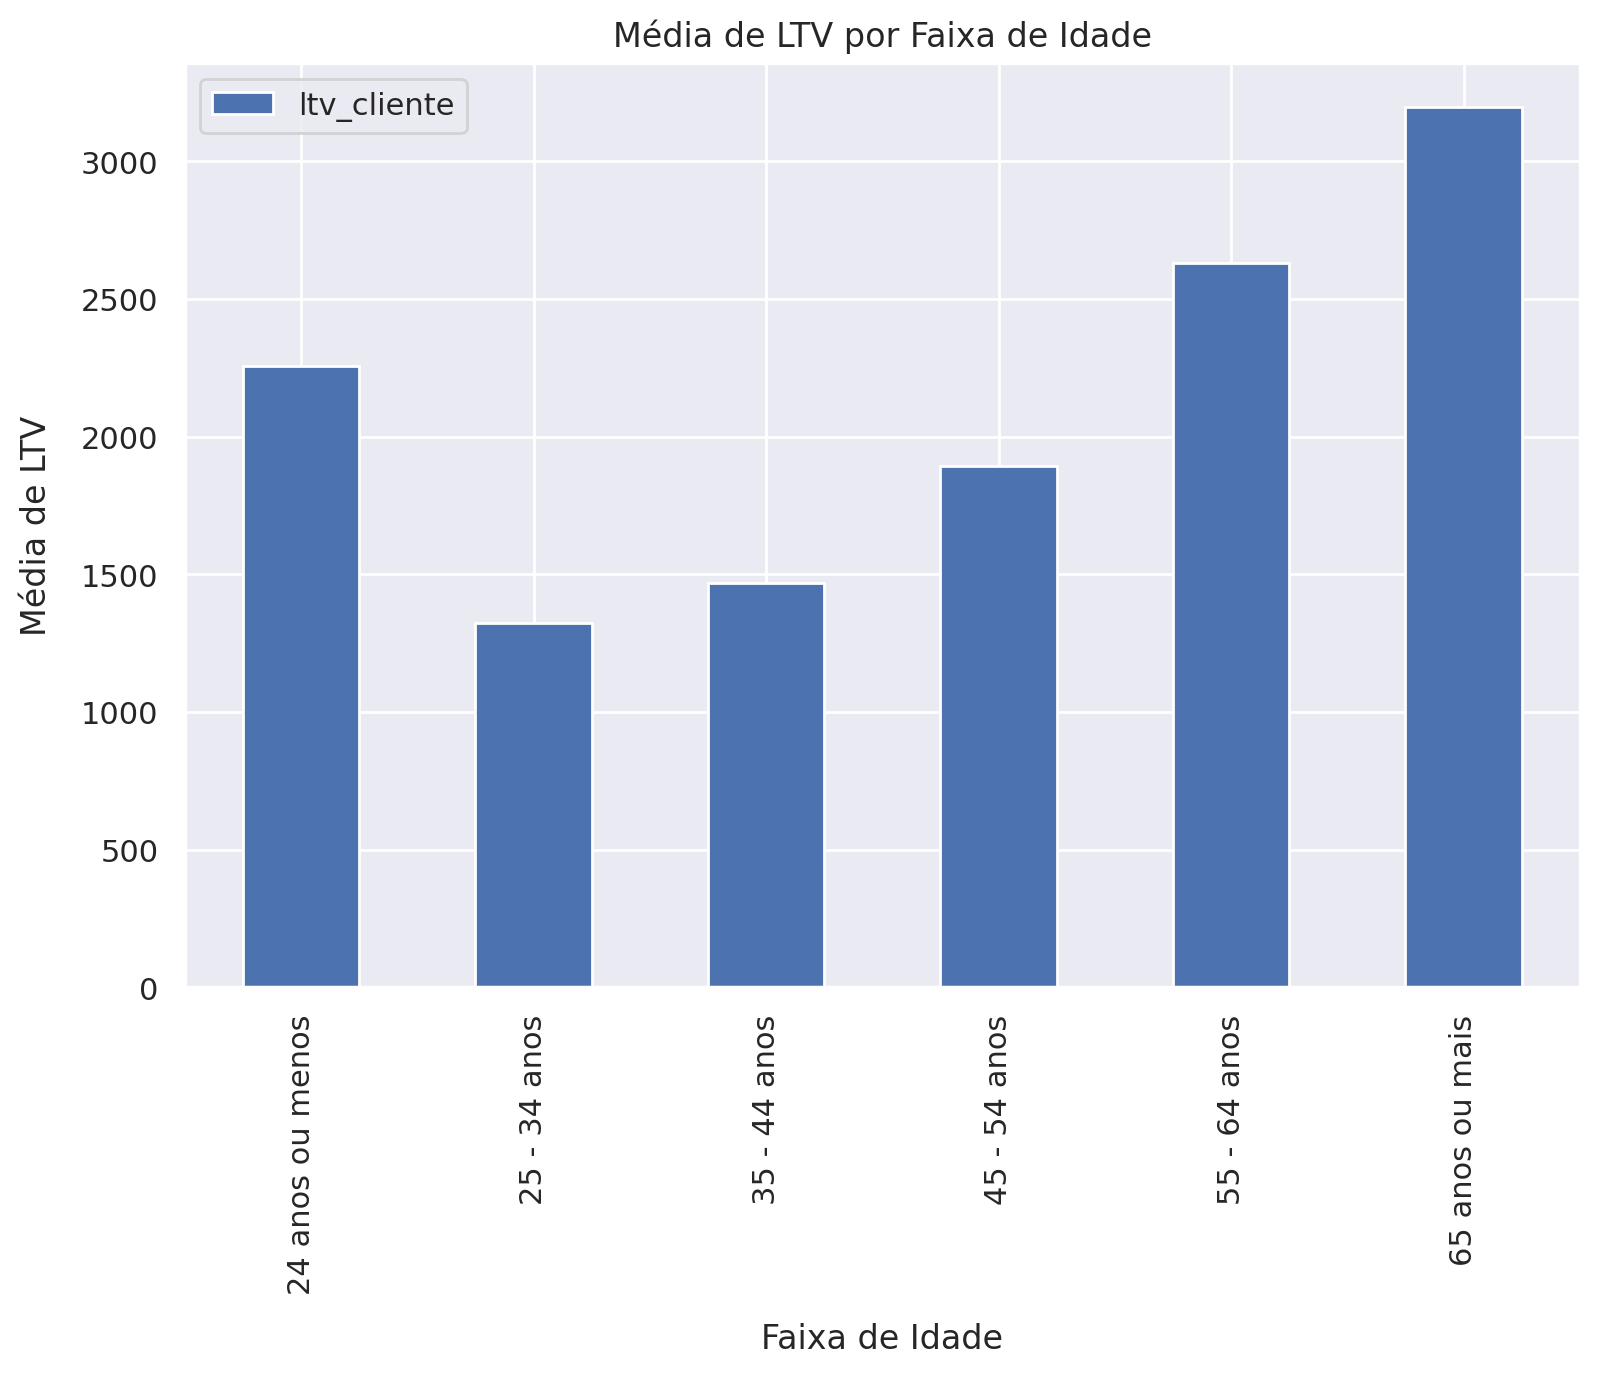

In [785]:
df_media = pd.DataFrame(
    df_novo.groupby(by='faixas_idade')['ltv_cliente'].mean()
)

df_media.plot(kind='bar')

# Define o título do gráfico e dos eixos
plt.title('Média de LTV por Faixa de Idade')
plt.xlabel('Faixa de Idade')
plt.ylabel('Média de LTV')

# Exibe o gráfico
plt.show()


## LTV por escolaridade

In [786]:
pd.DataFrame(
    df_novo.groupby(
        by='escolaridade'
    )['ltv_cliente'].mean()
)

,ltv_cliente
escolaridade,
Doutorado,979.510000
Doutorado Completo,3275.067031
Ensino Fundamental Completo,1993.341178
Ensino Médio Completo,2211.680285
Ensino Superior Completo,2731.067095
Ensino fundamental,2294.559630
Ensino médio,3228.632746
Ensino superior,2875.165957
Fundamental completo,1024.870269


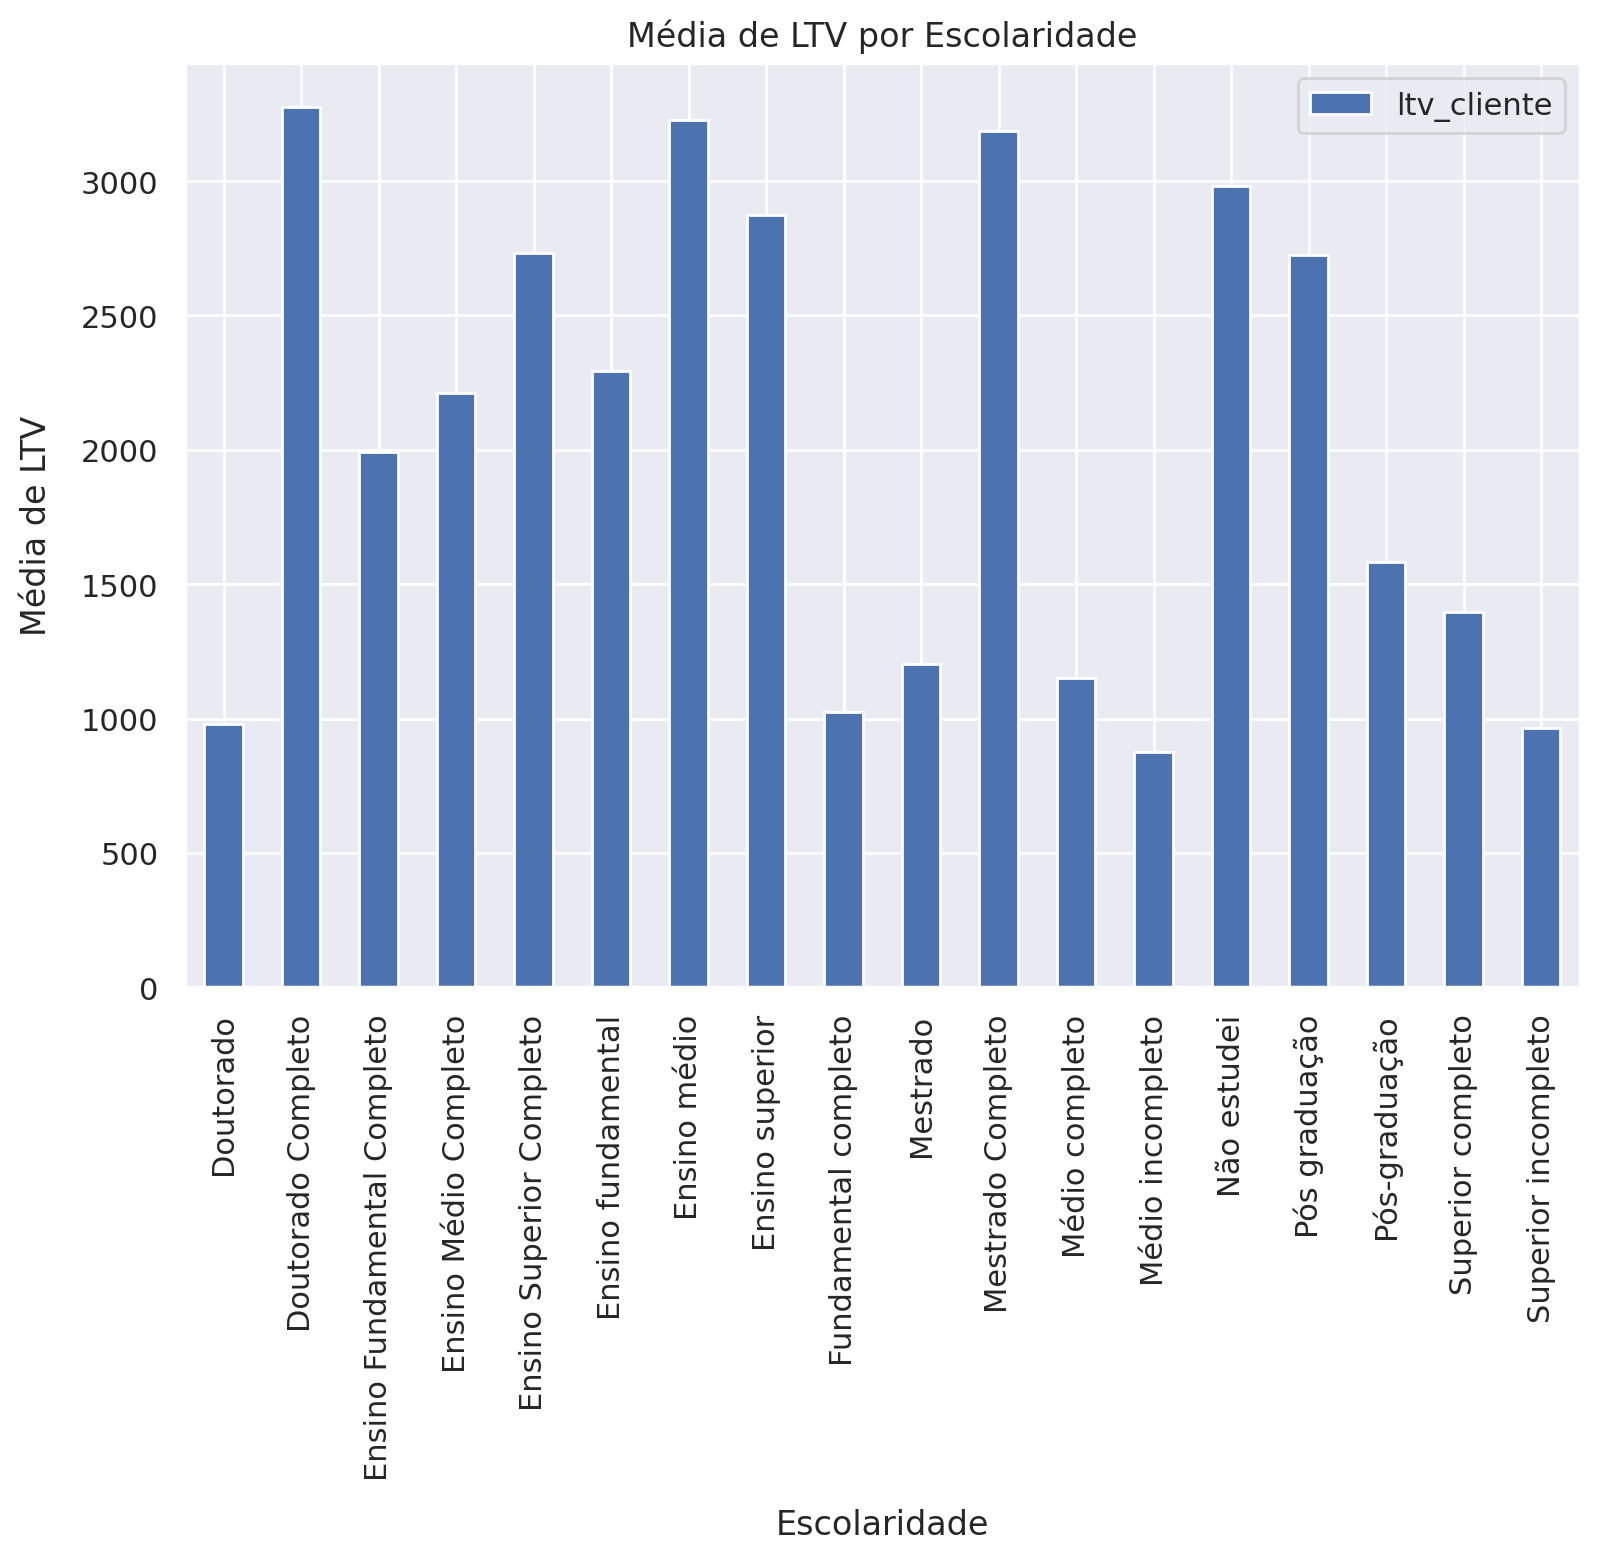

In [787]:
df_escolaridade = pd.DataFrame(
    df_novo.groupby(by='escolaridade')['ltv_cliente'].mean()
)

df_escolaridade.plot(kind='bar')

# Define o título do gráfico e dos eixos
plt.title('Média de LTV por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Média de LTV')

# Exibe o gráfico
plt.show()

## LTV por renda

In [788]:
pd.DataFrame(
    df_novo.groupby(
        by='renda_mensal'
    )['ltv_cliente'].mean()
)

,ltv_cliente
renda_mensal,
Acima de R$10.000,3394.122479
Entre R$1.000 e R$2.000,1887.008554
Entre R$2.000 e R$3.000,2360.158396
Entre R$3.000 e R$5.000,2651.972624
Entre R$5.000 e R$10.000,2852.239587
Entre R$500 e R$1.000,1664.851316
Estou Desempregada(o),1475.829718
Menos de R$500,1578.720311
Não quero informar,2847.001947


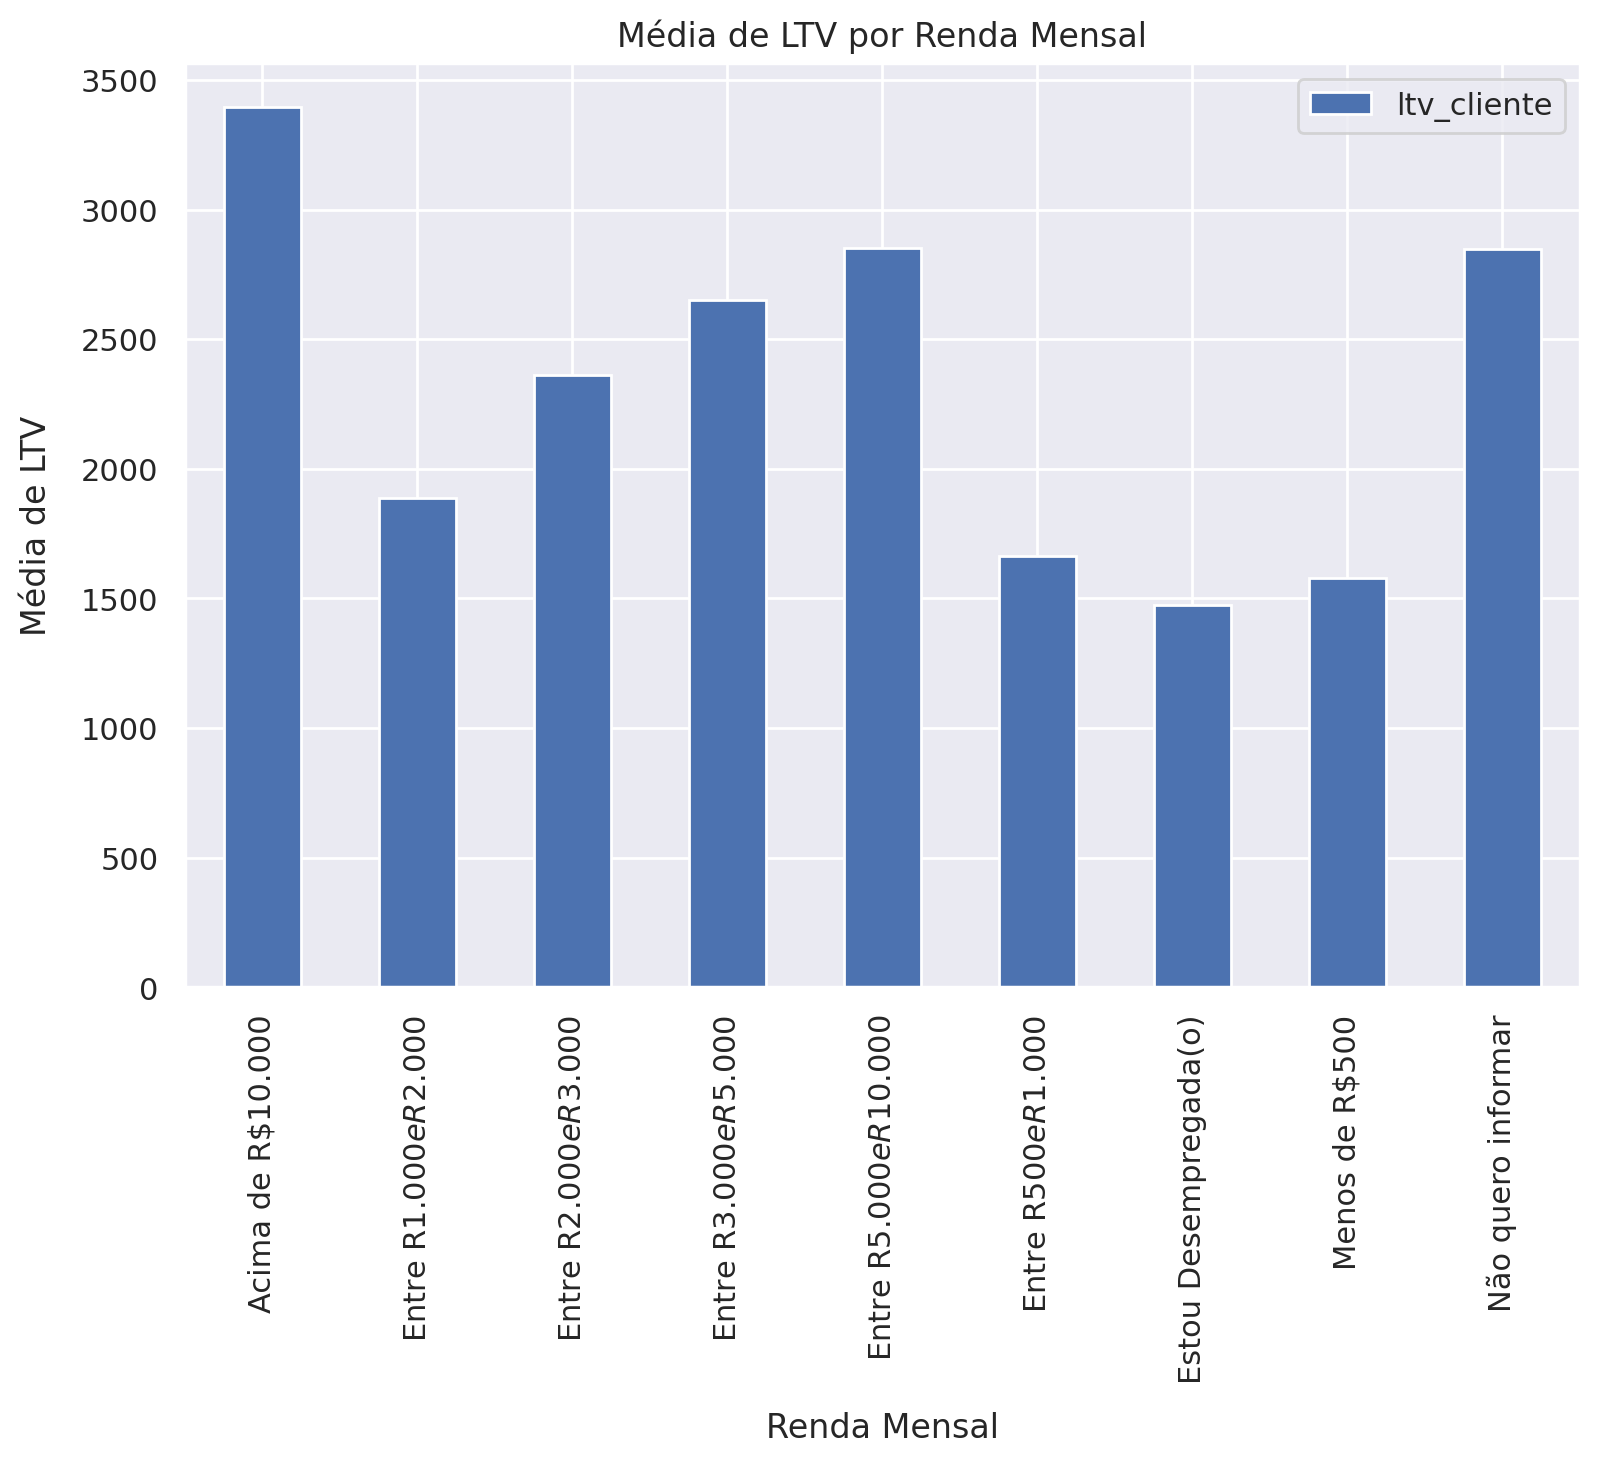

In [789]:
df_renda = pd.DataFrame(
    df_novo.groupby(by='renda_mensal')['ltv_cliente'].mean()
)

df_renda.plot(kind='bar')

# Define o título do gráfico e dos eixos
plt.title('Média de LTV por Renda Mensal')
plt.xlabel('Renda Mensal')
plt.ylabel('Média de LTV')

# Exibe o gráfico
plt.show()

# Teste T

A empresa acredita que o cliente que os seus melhores clientes possuem idade entre 45 e 54 anos. **Premissa para análise**: melhores clientes são aqueles que possuem o maior LTV

**HIpótese nula:** não há diferença significativa entre as médias das vendas dos clientes com idade entre 30 e 45 anos e as vendas dos clientes em outras faixas etárias

In [790]:
clientes_interesse = df_novo[df_novo['faixas_idade'] == '45 - 54 anos']
clientes_outros = df_novo[df_novo['faixas_idade'] != '45 - 54 anos']

clientes_interesse = clientes_interesse.dropna(subset=['ltv_cliente'])
clientes_outros = clientes_outros.dropna(subset=['ltv_cliente'])

t, p = ttest_ind(clientes_interesse['ltv_cliente'], clientes_outros['ltv_cliente'], equal_var=False)

print('O valor do teste t é:', t)
print('O valor p é:', p)


O valor do teste t é: -25.63997156091893
O valor p é: 8.103488941410954e-144


In [791]:
clientes_interesse = df_novo[df_novo['faixas_idade'] == '35 - 44 anos']
clientes_outros = df_novo[df_novo['faixas_idade'] != '35 - 44 anos']

clientes_interesse = clientes_interesse.dropna(subset=['ltv_cliente'])
clientes_outros = clientes_outros.dropna(subset=['ltv_cliente'])

t, p = ttest_ind(clientes_interesse['ltv_cliente'], clientes_outros['ltv_cliente'], equal_var=False)

print('O valor do teste t é:', t)
print('O valor p é:', p)


O valor do teste t é: -43.89385184645
O valor p é: 0.0


# Tranformação das variáveis categóricas em dummies

In [792]:
df = df.drop_duplicates(subset=['email_cliente'])


In [793]:
df_novo['faixas_idade'].value_counts()


55 - 64 anos        15048
45 - 54 anos        14635
65 anos ou mais      8390
35 - 44 anos         7461
25 - 34 anos         1345
24 anos ou menos      240
Name: faixas_idade, dtype: int64

In [794]:
dummie_idade = pd.get_dummies(df_novo['faixas_idade'], drop_first=True, prefix='idade')
df_novo = pd.concat([df_novo, dummie_idade], axis=1)

print(dummie_idade)

       idade_25 - 34 anos  idade_35 - 44 anos  idade_45 - 54 anos  \
20                      0                   0                   1   
21                      0                   0                   1   
53                      0                   0                   1   
54                      0                   0                   1   
56                      0                   0                   1   
...                   ...                 ...                 ...   
51727                   1                   0                   0   
51728                   0                   1                   0   
51729                   0                   0                   0   
51730                   0                   0                   1   
51731                   0                   0                   0   

       idade_55 - 64 anos  idade_65 anos ou mais  
20                      0                      0  
21                      0                      0  
53                

In [795]:
df_novo['renda_mensal'].value_counts()


Entre R$1.000 e R$2.000     8494
Entre R$2.000 e R$3.000     7347
Entre R$3.000 e R$5.000     7133
Não quero informar          6119
Entre R$500 e R$1.000       5246
Entre R$5.000 e R$10.000    4992
Estou Desempregada(o)       4483
Acima de R$10.000           1635
Menos de R$500              1214
Name: renda_mensal, dtype: int64

In [796]:
dummie_renda = pd.get_dummies(df_novo['renda_mensal'], drop_first=True)
df_novo = pd.concat([df_novo, dummie_renda], axis=1)
print(dummie_renda)

       Entre R$1.000 e R$2.000  Entre R$2.000 e R$3.000  \
20                           0                        0   
21                           0                        0   
53                           0                        0   
54                           0                        0   
56                           0                        0   
...                        ...                      ...   
51727                        1                        0   
51728                        0                        0   
51729                        0                        0   
51730                        0                        0   
51731                        0                        0   

       Entre R$3.000 e R$5.000  Entre R$5.000 e R$10.000  \
20                           0                         0   
21                           0                         0   
53                           0                         0   
54                           0                     

In [797]:
df_novo['primeiro_produto'].value_counts()


Revista Digital: Viva com Saúde por Dr. Dayan Siebra    8448
[VSA] Viva com Saúde (Assinatura)                       3799
[PED] Programa do Emagrecimento (Assinatura)            2759
PED • Programa de Emagrecimento Definitivo [P]          2723
PED • Programa de Emagrecimento Definitivo [R]          2350
                                                        ... 
Kit Vita - 1 Pote de Cada                                  1
VitaD                                                      1
Fórmula SB3 Amostra grátis                                 1
Vita D - Kit com 5 Potes                                   1
Vita D - Kit com 3 Potes                                   1
Name: primeiro_produto, Length: 178, dtype: int64

In [798]:
dummie_primeiroprod = pd.get_dummies(df_novo['primeiro_produto'], drop_first=True)
df_novo = pd.concat([df_novo, dummie_primeiroprod], axis=1)

print(dummie_primeiroprod)

       Belavita - Kit com 3 Potes  Belavita - Kit com 8 Potes  \
20                              0                           0   
21                              0                           0   
53                              0                           0   
54                              0                           0   
56                              0                           0   
...                           ...                         ...   
51727                           0                           0   
51728                           0                           0   
51729                           0                           0   
51730                           0                           0   
51731                           0                           0   

       Belavita - Pote Unitário  Colágeno Tipo 2 | 30 dias  \
20                            0                          0   
21                            0                          0   
53                            0  

In [799]:
dummie_genero = pd.get_dummies(df_novo['genero'], drop_first=True)
df_novo = pd.concat([df_novo, dummie_genero], axis=1)

print(dummie_genero)

       Mulher  Outro
20          1      0
21          1      0
53          1      0
54          1      0
56          1      0
...       ...    ...
51727       1      0
51728       0      0
51729       1      0
51730       1      0
51731       1      0

[47119 rows x 2 columns]


# Stepwise Selection

## Foward Selection

In [800]:
import pandas as pd

# Variáveis de entrada
X = df_novo[['idade_25 - 34 anos', 'idade_35 - 44 anos', 'idade_45 - 54 anos', 'idade_55 - 64 anos', 'idade_65 anos ou mais', 'Entre R$1.000 e R$2.000', 'Entre R$2.000 e R$3.000', 'Entre R$3.000 e R$5.000', 'Entre R$5.000 e R$10.000',
             'Entre R$500 e R$1.000', 'Estou Desempregada(o)', 'Menos de R$500', 'Não quero informar']]


# Variável de saída
y = df_novo['ltv_cliente']


In [801]:
X = sm.add_constant(X)

# iniciando o modelo com uma variável vazia 
model = sm.OLS(y, X[['const']]).fit()

# Loop para adicionar variáveis uma de cada vez
for i in X.columns:
    if i != 'const':
        # Adicionando uma variável ao modelo
        model_new = sm.OLS(y, X[['const', i]]).fit()
        # Verificando se a nova variável é significativa
        if model_new.f_pvalue < 0.5:
            model = model_new

# Imprimindo os resultados do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ltv_cliente   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     356.5
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           3.26e-79
Time:                        10:30:55   Log-Likelihood:            -4.3600e+05
No. Observations:               47119   AIC:                         8.720e+05
Df Residuals:                   47117   BIC:                         8.720e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2193.5211     12

## Backward Elimination

In [802]:
from zmq.constants import XPUB_MANUAL
# adição de constante para o modelo 
X = sm.add_constant(X)

# Variáveis de entrada
X = df_novo[['idade_25 - 34 anos', 'idade_35 - 44 anos', 'idade_45 - 54 anos', 'idade_55 - 64 anos', 'idade_65 anos ou mais', 'Entre R$1.000 e R$2.000', 'Entre R$2.000 e R$3.000', 'Entre R$3.000 e R$5.000', 'Entre R$5.000 e R$10.000',
             'Entre R$500 e R$1.000', 'Estou Desempregada(o)', 'Menos de R$500', 'Não quero informar', 'Mulher', 'Outro']]


# Variável de saída
y = df_novo['ltv_cliente']

# Enquanto houver mais de uma variável no modelo
while X.shape[1] > 1:
    
    # Ajustando o modelo de regressão linear
    model = sm.OLS(y, X).fit()
    
    # Calculando os valores p para todas as variáveis
    p_vals = model.pvalues
    
    # Encontrando a variável com o maior valor p
    max_p_idx = p_vals.argmax()
    
    # Removendo a variável com o maior valor p
    if max_p_idx == 0:
        X = X.iloc[:, 1:]
    else:
        X = X.drop(X.columns[max_p_idx], axis=1)
    
    # Imprimindo as variáveis selecionadas e os coeficientes correspondentes
    print('Selected features:', list(X.columns))
    print('Coefficients:', model.params)
    print('R-squared:', model.rsquared)
    print('\n')

Selected features: ['idade_25 - 34 anos', 'idade_35 - 44 anos', 'idade_45 - 54 anos', 'idade_55 - 64 anos', 'idade_65 anos ou mais', 'Entre R$1.000 e R$2.000', 'Entre R$2.000 e R$3.000', 'Entre R$5.000 e R$10.000', 'Entre R$500 e R$1.000', 'Estou Desempregada(o)', 'Menos de R$500', 'Não quero informar', 'Mulher', 'Outro']
Coefficients: idade_25 - 34 anos          1310.630147
idade_35 - 44 anos          1398.358857
idade_45 - 54 anos          1740.753549
idade_55 - 64 anos          2374.575429
idade_65 anos ou mais       2823.326501
Entre R$1.000 e R$2.000     -661.883763
Entre R$2.000 e R$3.000     -289.696466
Entre R$3.000 e R$5.000      -40.194369
Entre R$5.000 e R$10.000     108.055429
Entre R$500 e R$1.000       -886.958669
Estou Desempregada(o)       -939.586367
Menos de R$500              -833.745792
Não quero informar            97.341503
Mulher                       657.955107
Outro                      -1141.497237
dtype: float64
R-squared: 0.49110803096198063


Selected featu

# Regressão Linear

## Regressão Linear - Idade

In [803]:
# Variáveis de entrada
X = df_novo[['idade_25 - 34 anos', 'idade_35 - 44 anos', 'idade_45 - 54 anos', 'idade_55 - 64 anos', 'idade_65 anos ou mais']]

# Variável de saída
y = df_novo['ltv_cliente']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            ltv_cliente   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     567.5
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:30:56   Log-Likelihood:            -4.3480e+05
No. Observations:               47119   AIC:                         8.696e+05
Df Residuals:                   47113   BIC:                         8.697e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2255.06

## Regressão Linear - renda

In [804]:
# Variáveis de entrada
X = df_novo[['Entre R$1.000 e R$2.000', 'Entre R$2.000 e R$3.000', 'Entre R$3.000 e R$5.000', 'Entre R$5.000 e R$10.000',
             'Entre R$500 e R$1.000', 'Estou Desempregada(o)', 'Menos de R$500', 'Não quero informar']]


# Variável de saída
y = df_novo['ltv_cliente']

In [805]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ltv_cliente   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     250.1
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:30:56   Log-Likelihood:            -4.3520e+05
No. Observations:               47119   AIC:                         8.704e+05
Df Residuals:                   47110   BIC:                         8.705e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Regressão linear - Primeira compra

In [806]:
# Variáveis de entrada
X = df_novo[['Belavita - Kit com 3 Potes', 'Belavita - Kit com 8 Potes', 'Belavita - Pote Unitário', 'Colágeno Tipo 2 | 30 dias',
             'Colágeno Tipo 2 | Kit 60 dias', 'Colágeno Tipo 2 | Kit 90 dias', 'Detox Sistemico', 'Ebook Detox de 15 Dias', 'Evento Presencial Dayan Siebra',
             '[VSA] Viva com Saúde (Assinatura)', '[VSA] Viva com Saúde: Revista Digital (Assinatura)', '[VSA] Viva com Saúde: Revista Digital (One Time)', 'Ômega Vita - Kit com 3 Potes']]


# Variável de saída
y = df_novo['ltv_cliente']

In [807]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ltv_cliente   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     25.05
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.75e-61
Time:                        10:30:56   Log-Likelihood:            -4.3601e+05
No. Observations:               47119   AIC:                         8.721e+05
Df Residuals:                   47105   BIC:                         8.722e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

## Regressão Linear - Genero

In [808]:
# Variáveis de entrada
X = df_novo[['Mulher', 'Outro']]

# Variável de saída
y = df_novo['ltv_cliente']

In [809]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ltv_cliente   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     98.41
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           2.23e-43
Time:                        10:30:56   Log-Likelihood:            -4.3608e+05
No. Observations:               47119   AIC:                         8.722e+05
Df Residuals:                   47116   BIC:                         8.722e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1885.4856     30.427     61.967      0.0

##Regressão Linear - com base na variável selecionada pelo Backward Elimination

In [810]:
# Variáveis de entrada
X = df_novo[['idade_65 anos ou mais', 'idade_55 - 64 anos']]


# Variável de saída
y = df_novo['ltv_cliente']

In [811]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ltv_cliente   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1316.
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:30:57   Log-Likelihood:            -4.3490e+05
No. Observations:               47119   AIC:                         8.698e+05
Df Residuals:                   47116   BIC:                         8.698e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1730.42

In [814]:
# Fazer a previsão do LTV 
previsao_ltv = model.predict(X)

# Ordenar os clientes de acordo com a previsão de LTV
df_novo['previsao_ltv'] = previsao_ltv
clientes_ordenados = df_novo.sort_values('previsao_ltv', ascending=False)

# Selecionar os clientes com previsão mais alta de LTV
top_clientes = clientes_ordenados.head(20)

print(top_clientes)

                          email_cliente                         nome_cliente  \
13326           mneusaraujo@hotmail.com              Maria Neusa Araújo Lima   
40619       raimunda.correa53@gmail.com                Raimunda Moura Corrêa   
40617       raimunda.correa53@gmail.com                Raimunda Moura Correa   
40616       raimunda.correa53@gmail.com                Raimunda Moura Corrêa   
40615       raimunda.correa53@gmail.com                Raimunda Moura Correa   
40614           dariozorzal@hotmail.com                        Dario Zorzajl   
40613           dariozorzal@hotmail.com                         Dario Zorzal   
40603              lobato5000@ig.com.br            José Maria Pereira Lobato   
40602              lobato5000@ig.com.br            José Maria Pereira Lobato   
40601              lobato5000@ig.com.br            José Maria Pereira Lobato   
40597               emy202092@gmail.com              Antonieta Correia Silva   
40565        carmosinacruz@yahoo.com.br 